## Library yang akan digunakan

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memanggil dataset

In [17]:
df = pd.read_csv('Mcdonalds.csv')

## Deskripsi dataset

In [18]:
df.head()

,Menu Category,Menu Items,Serve_Size,Energy,Protein,Total_fat,Sat_Fat,Trans_fat,Cholesterols,Total_carbohydrate,Total_Sugars,Added_Sugars,Sodium
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


# DATA PREPARATION

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Menu Category       141 non-null    object 
 1   Menu Items          141 non-null    object 
 2   Serve_Size          141 non-null    object 
 3   Energy              141 non-null    float64
 4   Protein             141 non-null    float64
 5   Total_fat           141 non-null    float64
 6   Sat_Fat             141 non-null    float64
 7   Trans_fat           141 non-null    float64
 8   Cholesterols        141 non-null    float64
 9   Total_carbohydrate  141 non-null    float64
 10  Total_Sugars        141 non-null    float64
 11  Added_Sugars        141 non-null    float64
 12  Sodium              140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


## Mencari heatmap

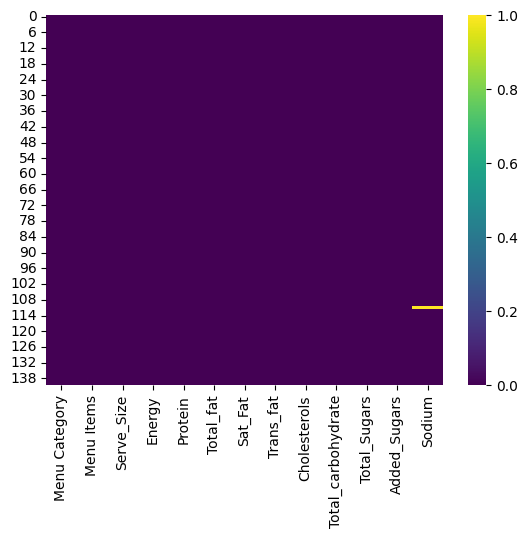

In [20]:
sns.heatmap(df.isnull(), cmap="viridis")

plt.show()

## Melihat Nilai Data

In [21]:
df.describe()

,Energy,Protein,Total_fat,Sat_Fat,Trans_fat,Cholesterols,Total_carbohydrate,Total_Sugars,Added_Sugars,Sodium
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


## Visualisasi Data

C:\Users\Irpan\AppData\Local\Temp\ipykernel_9400\74495684.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

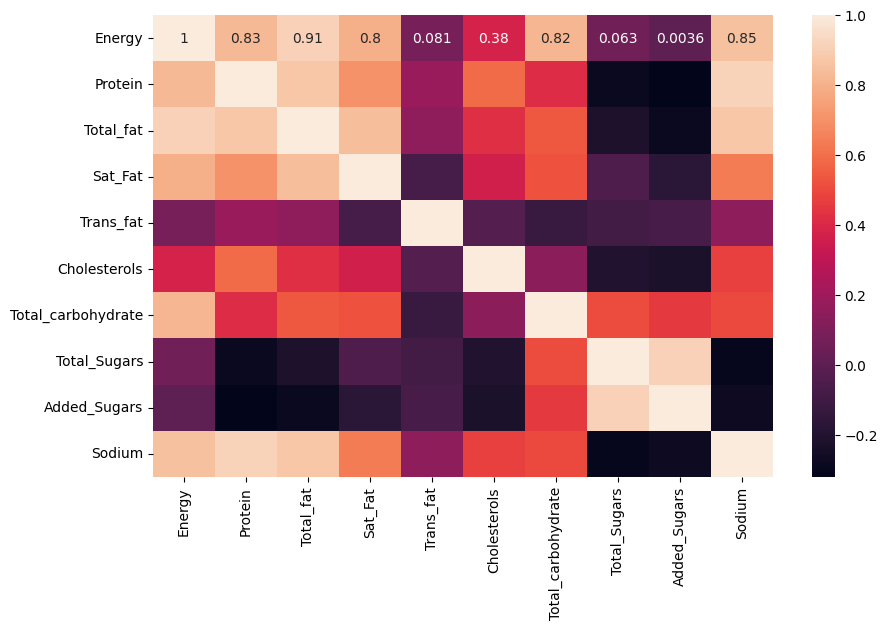

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

## Jumlah Energy Berdasarkan Size Menu

In [23]:
brands = df.groupby('Menu Category').count()[['Protein']].sort_values(by='Protein', ascending=True).reset_index()
brands = brands.rename(columns={'Protein':'Sat_Fat'})

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Desserts Menu'),
  Text(1, 0, 'Condiments Menu'),
  Text(2, 0, 'Gourmet Menu'),
  Text(3, 0, 'Breakfast Menu'),
  Text(4, 0, 'Beverages Menu'),
  Text(5, 0, 'Regular Menu'),
  Text(6, 0, 'McCafe Menu')])

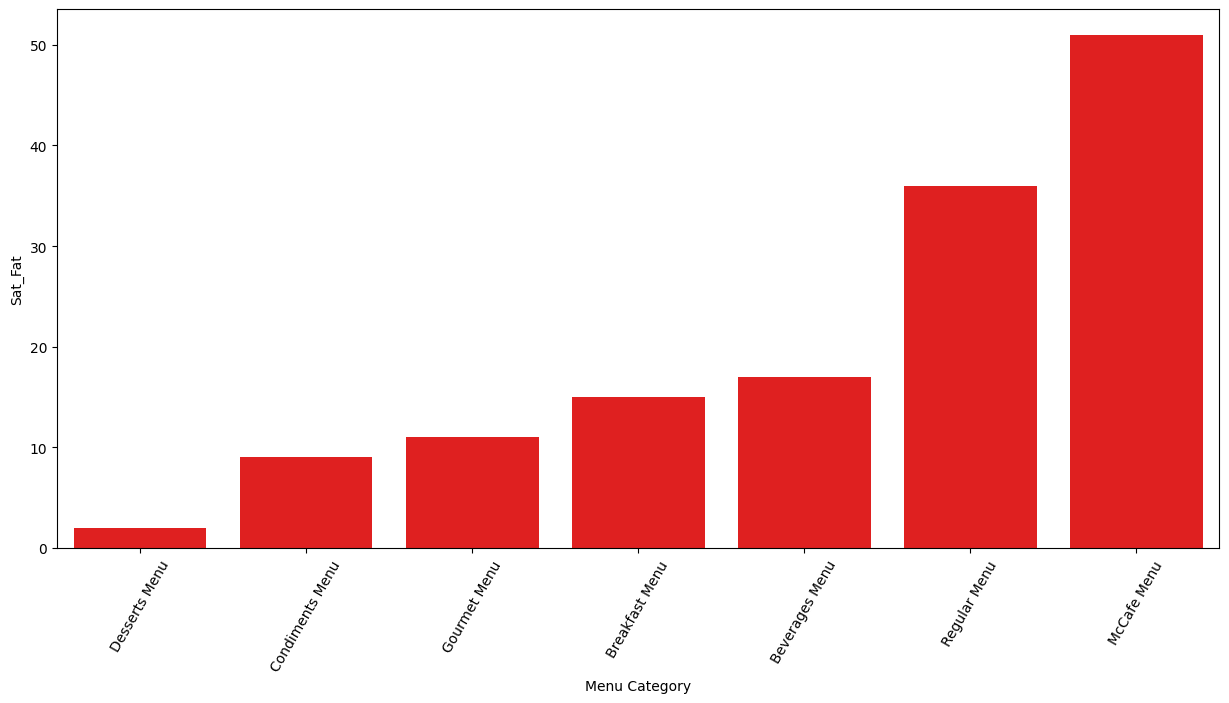

In [24]:
fig = plt.figure(figsize = (15,7))
sns.barplot(x = brands['Menu Category'], y = brands['Sat_Fat'], color = 'red')
plt.xticks(rotation = 60)

# MODELLING DATA

## Seleksi Fitur

In [25]:
fitur = ['Cholesterols', 'Total_carbohydrate', 'Total_Sugars', 'Protein','Trans_fat','Added_Sugars','Total_fat','Energy']
x = df[fitur]
y = df['Sat_Fat']
x.shape, y.shape

((141, 8), (141,))

## Split Data Training & Testing

In [26]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 70)
y_test.shape

(36,)

## membuat regresi linier

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# EVALUTION DATA

In [28]:
y = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  0.8398585197185817


## Membuat inputan regresi linier

In [29]:
#Cholesterols (mg) = 25.24 , Total_Carbohydrate (g) = 56.96 , Total_Sugars (g) = 7.85 , Protein (g) = 15.3 , Trans_fat = 0.21,  Added_Sugars = 4.76 , Total_fat = 23.45 , Sat_Fat
inputan = np.array([[25.24, 56.96, 7.85, 15.3, 0.21, 4.76, 23.45, 10.51]])
prediksi = lr.predict(inputan)
print('Estimasi Jumlah Energi dalam setiap size menu  : ', prediksi)

Estimasi Jumlah Energi dalam setiap size menu  :  [-17.2006059]


c:\Users\Irpan\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

## Save Model

In [30]:
import pickle
filename = 'estimasi_mcdonalds.sav'
pickle.dump(lr,open(filename,'wb'))